## token length states

In [6]:
import argparse
import json
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

# make proof_flow package available for imports
sys.path.append(os.path.abspath(os.path.join('..')))
from proof_flow.src.utils import repo_root

In [7]:
plt.style.use("rose-pine")

In [16]:
def token_length_info(
    hf_model_id: str,
    dataset_path: str,
):
    tokenizer = AutoTokenizer.from_pretrained(hf_model_id)
    path = repo_root() / "data" / dataset_path
    with open(path, "r") as f:
        dataset = json.load(f)
    
    # per theorem
    start_state_lengths = []
    max_state_length = []
    max_tactic_length = []

    for thm_dict in dataset.values():
        state_lengths = []
        tactic_lengths = []
        for tt in thm_dict["traced_tactics"]:
            state_lengths.append(
                len(tokenizer.encode(tt["state_before"]))
            )
            tactic_lengths.append(
                len(tokenizer.encode(tt["tactic"]))
            )
        start_state_lengths.append(state_lengths[0])
        max_state_length.append(max(state_lengths))
        max_tactic_length.append(max(tactic_lengths))
    
    df = pd.DataFrame({
        "thm_idx": list(dataset.keys()),
        "start_state_lengths": start_state_lengths,
        "max_state_length": max_state_length,
        "max_tactic_length": max_tactic_length,
    })
    df["max/start"] = df["max_state_length"] / df["start_state_lengths"]
    print(f"max state length: {max(max_state_length)}")
    print(df.describe())

    return df

In [17]:
reprover_tacgen_id = "kaiyuy/leandojo-lean4-tacgen-byt5-small"

In [18]:
long1k_file = "long1k_train.json"

In [19]:
df = token_length_info(
    hf_model_id=reprover_tacgen_id,
    dataset_path=long1k_file,
)

max state length: 265
       start_state_lengths  max_state_length  max_tactic_length    max/start
count          1000.000000       1000.000000        1000.000000  1000.000000
mean            111.240000        138.448000          40.627000     1.344350
std              45.493341         47.104035          16.094064     0.515614
min              14.000000         25.000000           4.000000     1.000000
25%              77.000000        102.000000          28.000000     1.056325
50%             110.000000        142.000000          41.000000     1.200000
75%             145.000000        174.000000          52.000000     1.429121
max             230.000000        265.000000          87.000000     6.481481


(array([244.,  98.,  92., 106.,  68.,  72.,  36.,  41.,  32.,  27.,  26.,
         18.,  21.,  15.,  14.,   6.,   9.,  11.,   3.,   4.,   5.,   0.,
          8.,   6.,   1.,   6.,   3.,   1.,   2.,   2.,   0.,   0.,   3.,
          0.,   0.,   0.,   1.,   1.,   1.,   2.,   1.,   1.,   0.,   1.,
          0.,   0.,   3.,   0.,   3.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([1.        , 1.05481481, 1.10962963, 1.16444444, 1.21925926,
        1.27407407, 1.32888889, 1.3837037 , 1.43851852, 1.49333333,
        1.54814815, 1.60296296, 1.65777778, 1.71259259, 1.76740741,
        1.82222222, 1.87703704, 1.93185185, 1.98666667, 2.04148148,
        2.0962963 , 2.15111111, 2.20592593, 2.

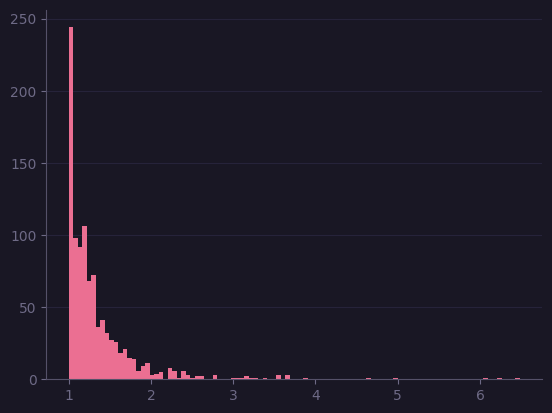

In [15]:
plt.hist(df["max/start"], bins=100)